In [0]:
# importing various libraries

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, LassoCV

In [0]:
# ignores the warnings from sklearn and seaborn libraries
import warnings
def warning_remover(*args, **kwargs):
    pass
warnings.warn = warning_remover 

In [6]:
# reads the uploaded .csv files
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")
test_alter = pd.read_csv("test.csv")

train_length = train.shape[0]
houses = pd.concat([train,test], sort = False)
print(train.shape)
print(test.shape)
print(train_length)

(1460, 81)
(1459, 80)
1460


In [0]:
# these next for loops check for values that read "None" or "Not Available" for numerical and categorical data and replaces those values with either a "0", "None", "Mode", or "Mean"
for i in ('Alley','Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
           'PoolQC','Fence','MiscFeature'):
    train[i] = train[i].fillna('None')
    test[i] = test[i].fillna('None')

In [0]:
for i in ('MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional'): 
    train[i]=train[i].fillna(train[i].mode()[0])
    test[i]=test[i].fillna(train[i].mode()[0])

In [9]:
houses.select_dtypes(include=['int','float']).isnull().sum()[houses.select_dtypes(include=['int','float']).isnull().sum() > 0]

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

In [0]:
for i in ('MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea'):
    train[i]=train[i].fillna(0)
    test[i]=test[i].fillna(0)

In [0]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage'] = test['LotFrontage'].fillna(train['LotFrontage'].mean())

In [12]:
print(train.isnull().sum().sum())
print(train.isnull().sum().sum())

0
0


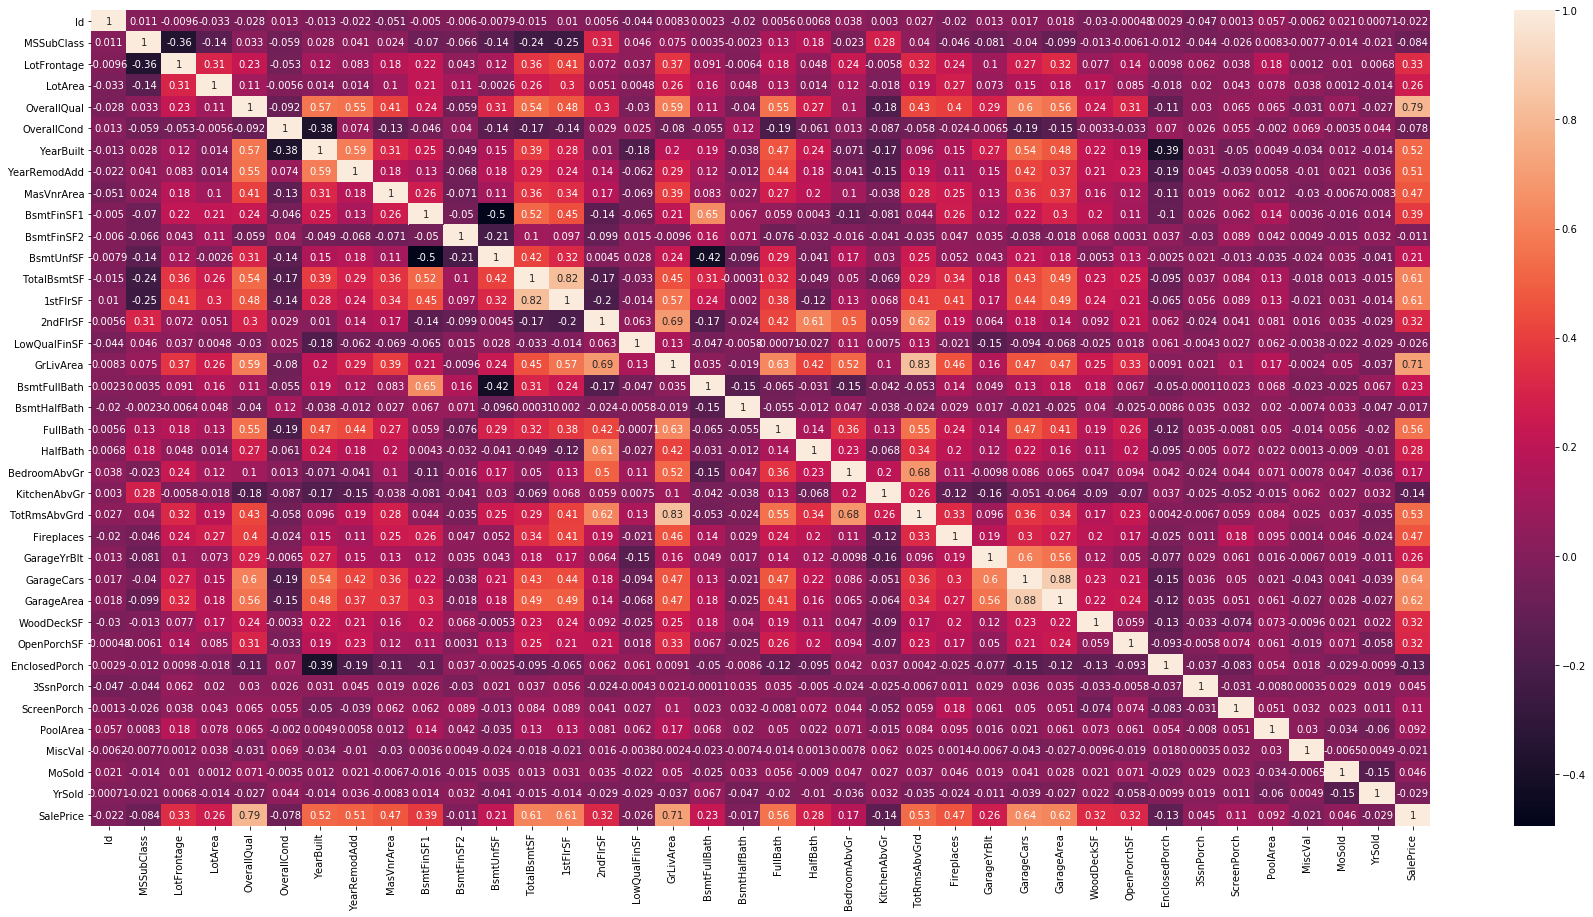

In [13]:
# this part is about checking outliers and removing them using a heatmap from the seaborn library for visualisation
plt.figure(figsize = [30,15]) 
sns.heatmap(train.corr(), annot = True)

In [0]:
# from two features high correlated, removing the less correlated with SalePrice
train.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd','2ndFlrSF'], axis = 1, inplace = True)
test.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd','2ndFlrSF'], axis = 1, inplace = True)

In [0]:
# removing outliers as recommended
train = train[train['GrLivArea'] < 4000]

In [16]:
train_length=train.shape[0]
print(train.shape) # We can see from this that data has been successfully removed

(1456, 77)


In [0]:
# this looks at transforming numerical data into categorical data
houses = pd.concat([train,test], sort=False)

In [0]:
houses['MSSubClass']=houses['MSSubClass'].astype(str)

In [0]:
skew = houses.select_dtypes(include=['int','float']).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skew_df = pd.DataFrame({'Skew':skew})
skewed_df = skew_df[(skew_df['Skew'] > 0.5)|(skew_df['Skew'] < -0.5)]

In [20]:
skewed_df.index

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'SalePrice',
       'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces',
       'HalfBath', 'TotalBsmtSF', 'BsmtFullBath', 'OverallCond', 'YearBuilt',
       'GarageYrBlt'],
      dtype='object')

In [0]:
train = houses[:train_length]
test = houses[train_length:]

In [0]:
lam=0.1
for i in ('MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF',
       'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces',
       'HalfBath', 'TotalBsmtSF', 'BsmtFullBath', 'OverallCond', 'YearBuilt',
       'GarageYrBlt'):
    train[i] = boxcox1p(train[i],lam)
    test[i] = boxcox1p(test[i],lam)

In [0]:
train['SalePrice'] = np.log(train['SalePrice'])

In [0]:
houses = pd.concat([train,test], sort=False)
houses = pd.get_dummies(houses)

In [0]:
# this small section prepares the data for a model
train = houses[:train_length]
test = houses[train_length:]

In [0]:
train.drop('Id', axis = 1, inplace=True)
test.drop('Id', axis = 1, inplace=True)

In [0]:
x = train.drop('SalePrice', axis=1)
y = train['SalePrice']
test = test.drop('SalePrice', axis=1)

In [0]:
sc = RobustScaler()
x = sc.fit_transform(x)
test = sc.transform(test)

In [0]:
# using lasso, we can create the model
model = Lasso(alpha =0.001, random_state=1)

In [30]:
model.fit(x,y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
# this is the prediction and submission part of the model
prediction = model.predict(test) 
predictions = np.exp(prediction)

In [0]:
output = pd.DataFrame({'Id':test_alter.Id, 'SalePrice':predictions})
output.to_csv('submission.csv', index=False)

In [33]:
output.head()

,Id,SalePrice
0,1461,118507.718647
1,1462,149373.207000
2,1463,180466.267384
3,1464,198232.862335
4,1465,192988.640101
